In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

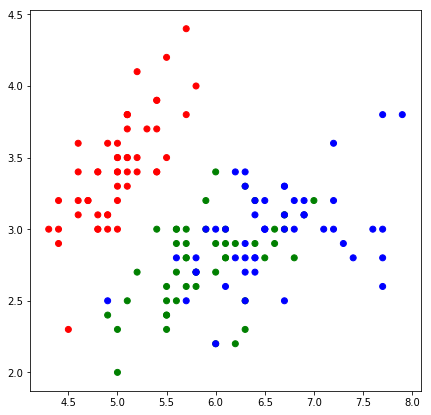

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [120]:
def get_graph(X_train, y_train, k, knn_func):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_func(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [112]:
k = 3 
y_pred = knn(X_train, y_train, X_test, k)

In [119]:
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


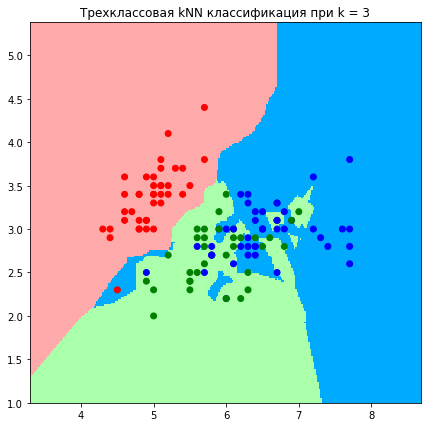

In [121]:
get_graph(X_train, y_train, k, knn)

# Задание 1

In [96]:
def knn_number_weight(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0.0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        j = 0
        for d in sorted(test_distances)[0:k]:
            j += 1
            classes[d[1]] += 1 / j
            
        # print (classes)
        # print (sorted(classes, key=classes.get))
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [122]:
y_pred2 = knn_number_weight(X_train, y_train, X_test, k)

In [124]:
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred2, y_test):.3f}')

Точность алгоритма при k = 3: 0.667


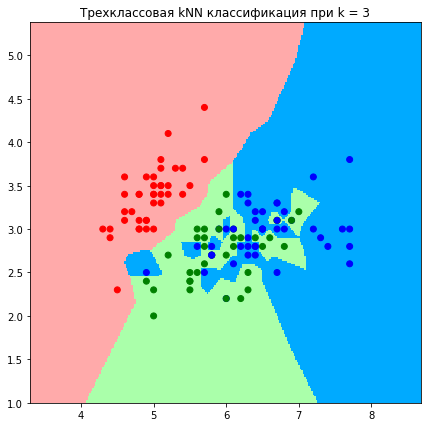

In [125]:
get_graph(X_train, y_train, k, knn_number_weight)

# Задание 2

In [149]:
def knn_distance_weight(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0.0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        j = 0
        for d in sorted(test_distances)[0:k]:
            j += 1
            classes[d[1]] += 1 / ((d[0] + 1) ** 2)
            
        # print (classes)
        # print (sorted(classes, key=classes.get))
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [126]:
y_pred3 = knn_distance_weight(X_train, y_train, X_test, k)

In [127]:
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred3, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


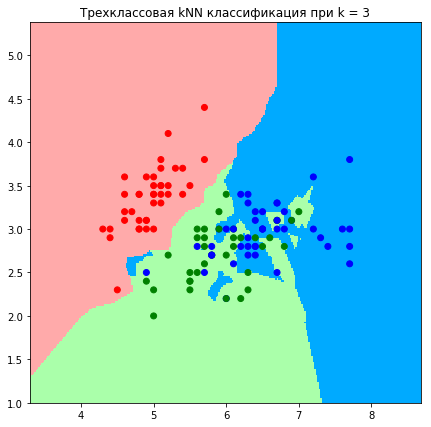

In [128]:
get_graph(X_train, y_train, k, knn_distance_weight)

### Точность предсказания при фксированном k = 3, равна для модели без весов и модели с весами в зависимости от расстояний. Точноть модели с весами в зависимости от номера соседа уступает двум другим. Вероятно это связано с тем, что в областях где модели ошибаются чаще всего точки собраны в группах, расстояние внутри которых визуально одинаковы, поэтому алгоритму сложно отличить один класс от другого. Гипперплоскости во всех трех случаях достаточно сложные, однко в третьем случае субъективно эта плоскость чуть проще

# Задание 3

In [150]:
k = 3
y_pred = knn_distance_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


In [151]:
k = 5
y_pred = knn_distance_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


In [152]:
k = 7
y_pred = knn_distance_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.800


In [153]:
k = 15
y_pred = knn_distance_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 15: 0.833


In [154]:
k = 50
y_pred = knn_distance_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 50: 0.800


In [140]:
k = 3
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.667


In [141]:
k = 5
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


In [142]:
k = 7
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.733


In [143]:
k = 15
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 15: 0.767


In [144]:
k = 50
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 50: 0.833


In [145]:
k = 100
y_pred = knn_number_weight(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 100: 0.833


### При использование весов зависящих от расстояния, можель ведет себя сабсолютно также как и при отсутствии весов, оптипальное число учитываемых соседей - 5, далее настпуает "переобучение". При использование весов зависящих от номера соседа, можель ведет себя ощетымо хуже - точность повышается медленно, однако она не падает с ростом k.

# Задание 4

In [157]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

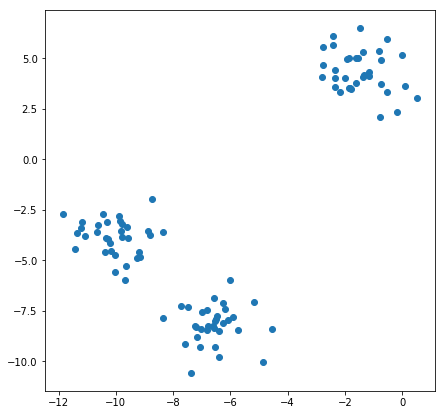

In [158]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [159]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [186]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

In [187]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

In [188]:
def calc_average_distance(centroid, cluster):
    dist = 0
    for point in cluster:
        dist += e_metrics(point, centroid)
    return dist / len(cluster)

In [189]:
def calc_average_dist_for_all_clusters(centroids, clusters):
    dist = 0
    for centroid, cluster in zip(centroids, clusters.values()):
        dist += calc_average_distance(centroid, cluster)
    return dist / len(centroids)

In [190]:
calc_average_dist_for_all_clusters(centroids, clusters)

1.1704436643186567

In [192]:
dists = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    dists.append(calc_average_dist_for_all_clusters(centroids, clusters))

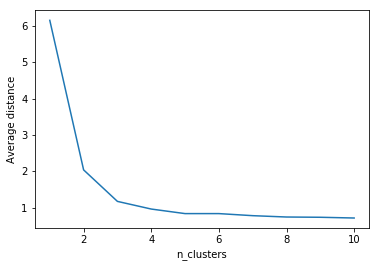

In [194]:
plt.xlabel('n_clusters')
plt.ylabel('Average distance')
plt.plot(list(range(1, 11)), dists, label='train error')
plt.show()